<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EC%97%AD%EC%A0%84%ED%8C%8C(Back_propagation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

def sigmoid(x) :
    return 1 / (1 + math.exp(-x))

'''
X, y 를 가장 잘 설명하는 parameter (w1, w2, w3)를 반환하는
함수를 작성하세요. 여기서 X는 (x1, x2, x3) 의 list이며, y 는
0 혹은 1로 이루어진 list입니다. 예를 들어, X, y는 다음의 값을
가질 수 있습니다.

    X = [(1, 0, 0), (1, 0, 1), (0, 0, 1)]
    y = [0, 1, 1]
'''

'''
1. 지시 사항을 따라서 getParameters 함수를 완성하세요.

Step01. X의 한 원소가 3개이므로 가중치도 3개가 있어야 합니다.
        초기 가중치 w를 [1,1,1]로 정의하는 코드를 작성하세요.

        단순히 f = 3, w = [1,1,1]이라고 하는 것보다 좀 더
        좋은 표현을 생각해보세요.


Step02. 초기 가중치 w를 모델에 맞게 계속 업데이트 해야합니다.

        업데이트를 위해 초기 가중치 w에 더해지는 값들의 리스트
        wPrime을 [0,0,0]로 정의하는 코드를 작성하세요.

        마찬가지로 단순히 wPrime = [0,0,0]이라고 하는 것보다
        좀 더 좋은 표현을 생각해보세요.


Step03. sigmoid 함수를 통과할 r값을 정의해야합니다. r은
        X의 각 값과 그에 해당하는 가중치 w의 곱의 합입니다.

        즉, r = X_0_0 * w_0 + X_1_0 * w_0 + ... + X_2_2 * w_2
        가 됩니다.

        그리고 sigmoid 함수를 통과한 r값을 v로 정의합시다.


Step04. 가중치 w가 더이상 업데이트가 안될 때까지 업데이트 해줘야합니다.
        즉, 가중치 w의 업데이트를 위해 더해지는 wPrime의 절댓값이 어느 정도까지
        작아지면 업데이트를 끝내야 합니다.

        그 값을 0.001로 정하고, wPrime이 그 값을 넘지 못하면 가중치
        업데이트를 끝내도록 합시다.

        다만 wPrime의 절댓값이 0.001보다 작아지기 전까지는 w에 wPrime을 계속
        더하면서 w를 업데이트 합시다.
'''

def getParameters(X, y) :

    # Step01.

    f = len(X[0]) # X의 원소의 개수

    w = [1] * f

    values = []

    while True :

        # Step02.

        wPrime = [0] * f

        # Step03.

        for i in range(len(y)) :
            r = 0
            for j in range(f) :
                r = r + X[i][j] * w[j]

            v = sigmoid(r)

            # w를 업데이트하기 위한 wPrime을 역전파를 이용해 구하는 식
            for j in range(f) :
                wPrime[j] += -((v - y[i]) * v * (1-v) * X[i][j])

        # Step04.

        flag = False

        for i in range(f) :
            if abs(wPrime[i]) >= 0.001 :
                flag = True
                break

        if flag == False :
            break # 업데이트 멈춤

        for j in range(f) :
            w[j] = w[j] + wPrime[j]

    return w

def main():

    '''
    이 코드는 수정하지 마세요.
    '''

    # X = [(1, 0, 0), (1, 0, 1), (0, 0, 1)]
    # y = [0, 1, 1]


    # 아래의 예제 또한 테스트 해보세요.
    X = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
    y = [0, 0, 1, 1, 1, 1, 1, 1]
    '''
    # 아래의 예제를 perceptron이 100% training할 수 있는지도 확인해봅니다.
    X = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
    y = [0, 0, 0, 1, 0, 1, 1, 1]
    '''

    print(getParameters(X, y))

if __name__ == "__main__":
    main()

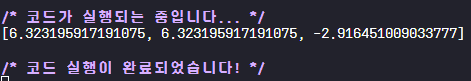